D-Tree Accuracy: 0.5981473312748126
K-Nearest Neighbors Accuracy: 0.6400529333921482
Neural Network Accuracy: 0.658579620644023
Classification Report:
                    precision    recall  f1-score   support

    Not Successful       0.71      0.78      0.74      1442
Funding Successful       0.54      0.45      0.49       825

          accuracy                           0.66      2267
         macro avg       0.62      0.61      0.62      2267
      weighted avg       0.65      0.66      0.65      2267

Confusion Matrix:
[[1121  321]
 [ 453  372]]
An error occurred


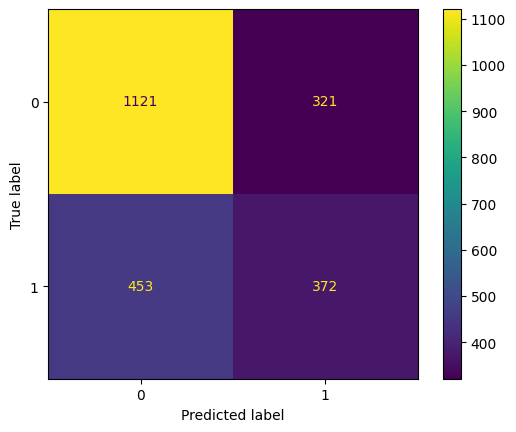

In [ ]:
import requests, nltk, sklearn.neighbors, sklearn.neural_network, sklearn.tree, wordcloud, textblob, pandas as pd, csv, matplotlib as plt, sklearn.model_selection, sklearn.metrics, joblib, warnings

url = "https://dgoldberg.sdsu.edu/515/kickstarter_data_full.csv"

# Ignore warning messages during neural network training
warnings.filterwarnings("ignore")

try:
    # Load the CSV file directly from the URL
    df = pd.read_csv(url, encoding="latin-1")
    df['y'] = (df['Status'] == 'Funding Successful').astype(int)
    x = df['Description']
    y = df['y']

    # setting up x train, y train and splitting data
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state = 0)

    # Vectorize the text data
    max_features = 1000
    vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_features=max_features, stop_words='english')
    x_train_vec = vectorizer.fit_transform(x_train)
    x_test_vec = vectorizer.transform(x_test)

    # setting up decision tree and predicting values
    clf = sklearn.tree.DecisionTreeClassifier()
    clf = clf.fit(x_train_vec, y_train)
    predictions = clf.predict(x_test_vec)
    dt_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
    print("D-Tree Accuracy:", dt_accuracy)

    # setting up KNN and predicting values
    clf = sklearn.neighbors.KNeighborsClassifier(5)
    clf = clf.fit(x_train_vec, y_train)
    predictions = clf.predict(x_test_vec)
    knn_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
    print("K-Nearest Neighbors Accuracy:", knn_accuracy)

    # setting up NN and predicting values
    clf = sklearn.neural_network.MLPClassifier()
    clf = clf.fit(x_train_vec, y_train)
    predictions = clf.predict(x_test_vec)
    nn_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
    print("Neural Network Accuracy:", nn_accuracy)
    # most accurate

     # Check if NN is the most accurate model
    if nn_accuracy == max(dt_accuracy, knn_accuracy, nn_accuracy):
     # Print classification report
      print("Classification Report:")
      print(sklearn.metrics.classification_report(y_test, predictions, target_names = ["Not Successful", "Funding Successful"]))

     # Print confusion matrix
      print("Confusion Matrix:")
      cm = sklearn.metrics.confusion_matrix(y_test, predictions)
      disp = sklearn.metrics.ConfusionMatrixDisplay(cm)
      print(cm)
      disp.plot()
      plt.show()

      # Save the most accurate NN model to a file
      joblib.dump(clf, "nn_model.joblib")

except:
    print("An error occurred")

In [ ]:
# Download the NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True